<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

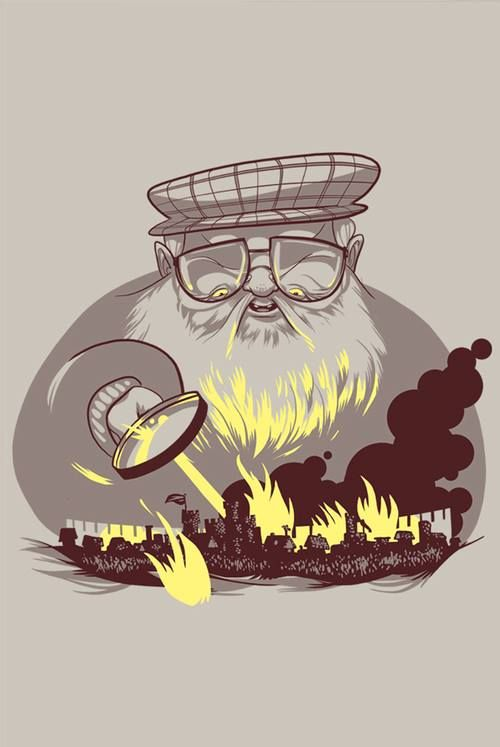

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 48.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 24.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from difflib import get_close_matches

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [127]:
data = pd.read_csv("game_of_thrones_train.csv", index_col='S.No')
test = pd.read_csv("game_of_thrones_test.csv", index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [128]:
data


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [129]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [130]:
for df in [data, test]:
  df.fillna({
      "title": "0",
      "culture": "0",
      "house": "0",
      "isAliveMother": 0,
      "isAliveFather": 0,
      "isAliveHeir": 0,
      "isAliveSpouse": 0,
      "age": df["age"].median()
  }, inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [131]:
for df in [data, test]:
  # Создание признака isPopular (порог 0.5)
  df["isPopular"] = (df["popularity"] > 0.5).astype(int)

  # Создание признака boolDeadRelations
  df["boolDeadRelations"] = (df["numDeadRelations"] > 0).astype(int)

In [132]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}


In [133]:
# Функция замены `culture` на стандартизированные классы
def standardize_culture(culture_value):
    if culture_value == "0":
        return "0"
    culture_value = culture_value.lower()
    for key, values in cult.items():
        if any(culture_value in v for v in values):
            return key
    return culture_value
for df in [data, test]:
    df["culture"] = df["culture"].apply(standardize_culture)

In [134]:
# Функция для извлечения фамилии (последнее слово в имени)
def extract_surname(name):
    if pd.isna(name):
        return "Unknown"
    return name.split()[-1]

for df in [data, test]:
  df["surname"] = df["name"].apply(extract_surname)

  # Группировка фамилий по схожести 80-90%
  unique_surnames = df["surname"].unique()
  surname_map = {}
  for surname in unique_surnames:
      close_match = get_close_matches(surname, surname_map.keys(), n=1, cutoff=0.8)
      if close_match:
          surname_map[surname] = surname_map[close_match[0]]
      else:
          surname_map[surname] = surname

  df["surname"] = df["surname"].map(surname_map)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [135]:
# Удаление бесполезных столбцов
for df in [data, test]:
  df.drop(columns=["name", "dateOfBirth",	"mother",	"father",	"heir", "spouse", "numDeadRelations"], inplace=True)
# признак popularity score удалять приказа не было

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

KeyError: 'isAlive'

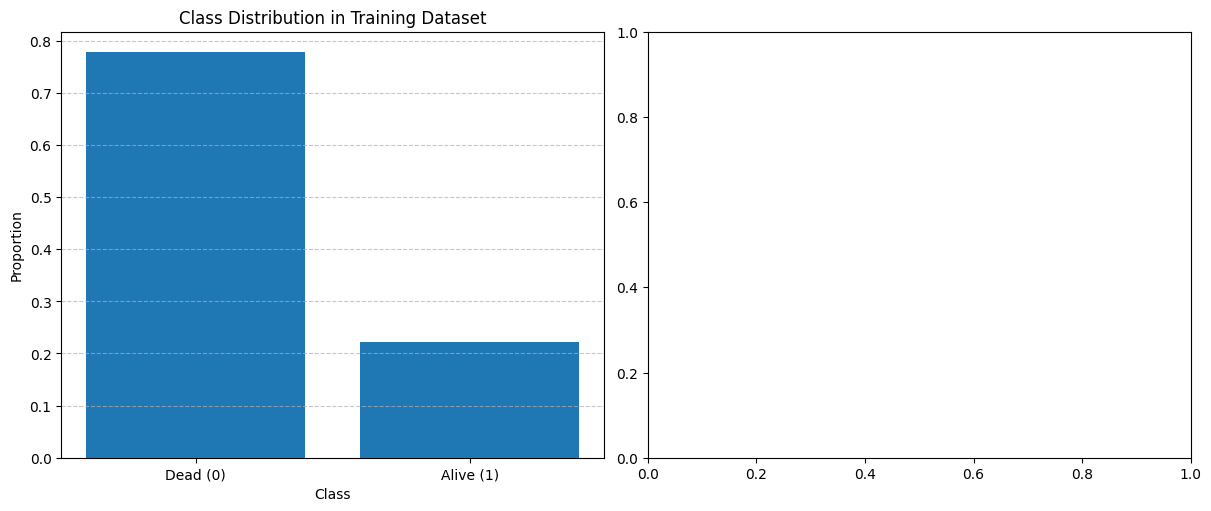

In [136]:
# Создание двух примеров датасетов (data и test) для демонстрации
data_vis = data.copy()
test_vis = test.copy()  # Пример тестового набора (половина данных)

# Построение двойного графика
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

for ax, dataset, title in zip(axes, [data_vis, test_vis], ["Training Dataset", "Test Dataset"]):
    target_counts = dataset["isAlive"].value_counts(normalize=True)  # Подсчет частот
    ax.bar(target_counts.index.astype(str), target_counts.values, tick_label=["Dead (0)", "Alive (1)"])
    ax.set_xlabel("Class")
    ax.set_ylabel("Proportion")
    ax.set_title(f"Class Distribution in {title}")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Вывод графиков
plt.show()

Как видим, датасет не сбалансирован, признаки имеют Integer тип, а в тестовом датасете этого признака вообще нет

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [137]:
# Кодирование `title`, `culture`, `house` числами
for df in [data, test]:
  label_encoders = {}
  for col in ["title", "culture", "house", "surname"]:
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])
      label_encoders[col] = le


In [141]:
data

,title,male,culture,house,book1,book2,book3,book4,book5,isAliveMother,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,popularity,isAlive,isPopular,boolDeadRelations,surname
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.24,0.605351,0,1.0,1.0,0.853189
2,0.594872,1.0,0.818182,0.339683,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.97,0.896321,1,1.0,1.0,0.329723
3,0.841026,1.0,0.000000,0.777778,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.24,0.267559,1,0.0,0.0,0.429603
4,0.748718,0.0,0.000000,0.069841,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.23,0.183946,0,0.0,0.0,0.068592
5,0.276923,0.0,0.090909,0.698413,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.29,0.043478,1,0.0,0.0,0.778580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.010256,1.0,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.24,0.160535,1,0.0,0.0,0.581227
1554,0.000000,0.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.24,0.040134,0,0.0,0.0,0.418773
1555,0.000000,1.0,0.000000,0.707937,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.24,0.076923,0,0.0,0.0,0.785800


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

<ipython-input-142-03539e0d59f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=isAlive_corr.values, y=isAlive_corr.index, palette="coolwarm")


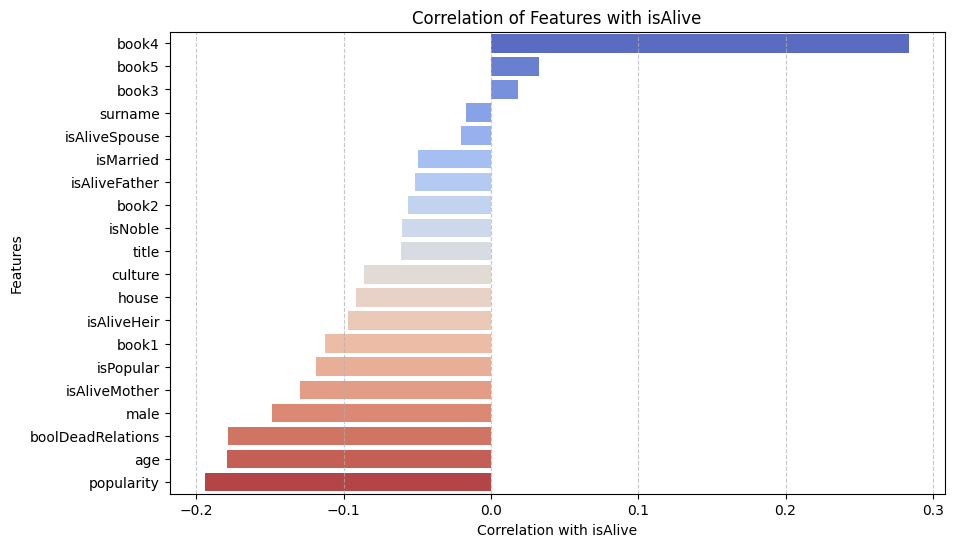

In [142]:
# Корреляция только с целевой переменной isAlive
isAlive_corr = data.corr()["isAlive"].drop("isAlive").sort_values(ascending=False)

# Визуализация корреляции в виде столбцов
plt.figure(figsize=(10, 6))
sns.barplot(x=isAlive_corr.values, y=isAlive_corr.index, palette="coolwarm")
plt.xlabel("Correlation with isAlive")
plt.ylabel("Features")
plt.title("Correlation of Features with isAlive")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Отображение графика
plt.show()

По результатам корреляционного анализа можем отделить признаки по их влиянию на исход:
1. Положительно коррелирующие признаки:
- book4 – Самая сильная положительная корреляция. Вероятно, персонажи, появлявшиеся в четвертой книге, имеют больше шансов быть живыми. Это может быть связано с тем, что книга охватывает более поздние события, а мертвые персонажи могли появляться в ранних частях.
- book5 и book3 – Легкая положительная корреляция, но практически незначительная.
2. Слабые или нейтральные признаки:
- Фамилия практически не влияет на вероятность выживания.
– Семейное положение слабо влияет, но есть небольшой негативный эффект (женатые персонажи чуть чаще умирают).
3. Отрицательно коррелирующие признаки:
- popularity – Чем популярнее персонаж, тем выше шанс смерти.
- age – Чем старше персонаж, тем выше вероятность смерти.
- boolDeadRelations - Если у персонажа много умерших знакомых, то и сам он с большей вероятностью мертв. Возможно, это связано с тем, что такие персонажи участвуют в войнах или других смертельно опасных событиях.
- Мужчины умирают чаще, чем женщины. Это может быть связано с тем, что мужчины чаще участвуют в сражениях.
- Если мать персонажа жива, это немного повышает его шанс на выживание (отрицательная корреляция с isAlive).
- title и isNoble негативно сказываются на выживаемости. Возможно, это связано с интригами, войнами и высокими ставками в политике.
- culture и house персонажа немного влияют на выживание, но не критично. Возможно, в некоторых домах смертность выше.

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [140]:
# Выбираем все столбцы, кроме 'isAlive'
not_all_cols = data.columns.drop('isAlive', errors='ignore')
for df in [data, test]:
  # Применяем Min-Max нормализацию ко всем числовым столбцам, кроме 'isAlive'
  df[not_all_cols] = df[not_all_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0, axis=0)

# Делим
X = data.drop(['isAlive'], axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [145]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [146]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [147]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# См. следующий блок

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [148]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [149]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8173


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
from sklearn.model_selection import KFold
import time
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct, WhiteKernel
# Создание KFold с перемешиванием
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Улучшенная версия Gaussian Process
kernel = RBF(length_scale=10.0) + WhiteKernel(noise_level=0.1)  # Комбинированное ядро
gp_model = GaussianProcessClassifier(kernel=kernel, optimizer="fmin_l_bfgs_b", max_iter_predict=1000, n_jobs=-1)

# Модели
models = {
    "Logistic regression": LogisticRegression(C=10, solver="lbfgs", max_iter=5000),
    "KNN with best n_neighbors=7": KNeighborsClassifier(n_neighbors=7, weights="distance"),
    "SVC with kernel rbf, C=10": SVC(kernel="rbf", C=10, gamma="scale"),
    "RandomForest with 200 estimators": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Decision Tree with max_depth=10": DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, random_state=42),
    "AdaBoost with n_estimators=100, learning_rate=0.5": AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42),
    "GaussianNB": GaussianNB(var_smoothing=1e-9),
    "GaussianProcessClassifier Improved": gp_model
}

# Проход по моделям
for name, model in models.items():
    y_true, y_pred = list(), list()
    start = time.time()

    for train_ix, test_ix in kf.split(X):
        # Разделение данных
        X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        # Обучение модели
        model.fit(X_train, y_train)

        # Предсказание
        y_hat = model.predict(X_test)

        # Сохранение результатов (заменяем ravel() на to_numpy())
        y_true.extend(y_test.to_numpy().astype(int))
        y_pred.extend(y_hat.astype(int))

    end = time.time()
    length = end - start

    # Вычисление accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f'Accuracy score ({name}): {acc:.3f}; It took {length:.2f} seconds!')

Accuracy score (Logistic regression): 0.805; It took 0.53 seconds!
Accuracy score (KNN with best n_neighbors=7): 0.780; It took 0.19 seconds!
Accuracy score (SVC with kernel rbf, C=10): 0.810; It took 3.24 seconds!
Accuracy score (RandomForest with 200 estimators): 0.822; It took 13.76 seconds!
Accuracy score (Decision Tree with max_depth=10): 0.802; It took 0.31 seconds!
Accuracy score (AdaBoost with n_estimators=100, learning_rate=0.5): 0.810; It took 8.10 seconds!
Accuracy score (GaussianNB): 0.790; It took 0.12 seconds!


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)